<a href="https://colab.research.google.com/github/cclarke411/Deep-Learning-Experiments/blob/master/parameteroptimization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import numpy as np

from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.models import Sequential
from keras.utils  import to_categorical
from keras import losses, models, optimizers
from keras.layers import  Dense,Conv2D,Flatten,MaxPooling2D,Dropout,Activation,GaussianNoise,BatchNormalization,LeakyReLU,AveragePooling2D
from keras import regularizers, optimizers
from keras.activations import relu, softmax
from keras.layers import Input,GlobalMaxPool1D,MaxPool1D
from keras.layers import Convolution1D
from hyperas import optim
from hyperas.distributions import choice, uniform
import os
from sklearn.model_selection import train_test_split



Using TensorFlow backend.


In [0]:
!pip install hyperas
!pip install hyperopt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# See: https://stackoverflow.com/questions/49920031/get-the-path-of-the-notebook-on-google-colab
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='parameteroptimization1.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('parameteroptimization1.ipynb')

In [0]:
save_path = '/content/drive/My Drive/Speech1'
os.chdir(save_path)

In [0]:
NM_test   = np.load('NM_test.npy')
NM_train  = np.load('NM_train.npy')
NMy_test1 = np.load('NMy_test1.npy')
NMy_train1= np.load('NMy_train1.npy')

In [0]:
NM_test.shape

(5450, 128, 87, 1)

In [0]:
from shutil import copyfile
copyfile('/content/drive/My Drive/Speech1/NM_test.npy', '/content/NM_test.npy')
copyfile('/content/drive/My Drive/Speech1/NM_train.npy', '/content/NM_train.npy')
copyfile('/content/drive/My Drive/Speech1/NMy_test1.npy', '/content/NMy_test1.npy')
copyfile('/content/drive/My Drive/Speech1/NMy_train1.npy', '/content/NMy_train1.npy')


'/content/NMy_train1.npy'

In [0]:
copyfile('/content/drive/My Drive/Speech1/y_mfccs,target.npy','/content/y_data.npy')

'/content/y_data.npy'

In [0]:
copyfile('/content/drive/My Drive/Speech1/y_mfccs_labels.npy','/content/yp.npy')

'/content/yp.npy'

In [0]:
y_data = np.load('y_data.npy')
yp = np.load('yp.npy')

data_1D = np.expand_dims(y_data,axis = 2).reshape(13623,44100,1)
NewX1D_train, NewX1D_test, Newy1D_train, Newy1D_test = train_test_split(data_1D, to_categorical(yp), test_size=0.5, shuffle = True)
X_train = NewX1D_train
Y_train = Newy1D_train
X_test = NewX1D_test
Y_test = Newy1D_test



In [0]:
np.save('NewX1D_train.npy',NewX1D_train)
np.save('NewX1D_test.npy',NewX1D_test)
np.save('Newy1D_train.npy',Newy1D_train)
np.save('Newy1D_test.npy',Newy1D_test)

In [0]:
Y_train.shape

(6811, 30)

In [0]:
def data_1d():
  X_train = np.load('NewX1D_train.npy')
  Y_train = np.load('Newy1D_train.npy')
  X_test = np.load('NewX1D_test.npy')
  Y_test = np.load('Newy1D_train.npy')
  X_test = X_test[0:6811]
  Y_test = Y_test[0:6811]
  return X_train, Y_train, X_test, Y_test

In [0]:
def conv_1d_model(X_train, Y_train, X_test, Y_test):
    nclass=30
    model = Sequential()
    model.add(Convolution1D(1,16, activation=relu, padding="valid",input_shape=(44100,1)))
    model.add(Convolution1D(1,16, activation=relu, padding="valid"))
    model.add(BatchNormalization())
    model.add(MaxPool1D(16))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Convolution1D(1,32, activation=relu, padding="valid"))
    model.add(Convolution1D(1,32, activation=relu, padding="valid"))
    model.add(BatchNormalization())
    model.add(MaxPool1D(4))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Convolution1D(1,32, activation=relu, padding="valid"))
    model.add(Convolution1D(1,32, activation=relu, padding="valid"))
    model.add(MaxPool1D(4))
    model.add(Dropout(rate=0.1))
    
    model.add(Convolution1D(1,32, activation=relu, padding="valid"))
    model.add(Convolution1D(1,32, activation=relu, padding="valid"))
    model.add(BatchNormalization())
    model.add(GlobalMaxPool1D())
    model.add(Dropout({{uniform(0, 1)}}))

    model.add(Dense({{choice([64, 128, 256])}}, activation=relu))
    model.add(Dense({{choice([64, 128, 256])}}, activation=relu))
    model.add(Dense(nclass, activation=softmax))
    
    model.compile(loss='binary_crossentropy',
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size={{choice([64, 128])}},
              nb_epoch=10,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [0]:
def data_2d():
  X_train = np.load('NM_train.npy')
  Y_train = np.load('NMy_train1.npy')
  X_test = np.load('NM_test.npy')
  Y_test = np.load('NMy_test1.npy')
  X_test = X_test[0:5450]
  Y_test = Y_test[0:5450]
  return X_train, Y_train, X_test, Y_test

In [0]:
def conv_2d_model(X_train, Y_train, X_test, Y_test):

    model = Sequential()
    #add model layers
    model.add(Conv2D({{choice([64, 128, 256])}}, kernel_size={{choice([2, 3, 5])}}, activation='relu', input_shape=(128 ,87,1)))
    model.add(BatchNormalization())
    model.add(Conv2D({{choice([32, 64, 128])}}, kernel_size=3, activation= 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D({{choice([16, 32, 64])}}, kernel_size=3, activation= 'relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(30, activation='softmax'))

    #compile model using accuracy to measure model performance

    model.compile(loss='binary_crossentropy',
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size={{choice([64, 128])}},
              nb_epoch=10,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [0]:
best_run, best_model = optim.minimize(model=conv_1d_model,
                                          data=data_1d,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='parameteroptimization1', # This is important!
                                          trials=Trials())

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    import numpy as np
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import to_categorical
except:
    pass

try:
    from keras import losses, models, optimizers
except:
    pass

try:
    from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation, GaussianNoise, BatchNormalization, LeakyReLU, AveragePooling2D
except:
    pass

try:
    from keras import regularizers, optimizers
except:
    pass

try:
    from keras.activations import relu, softmax
except:
    pass

try:
    from keras.layers import

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 15s - loss: 0.1477 - acc: 0.9666 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1473 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 3/10
 - 6s - loss: 0.1476 - acc: 0.9666 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1474 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1474 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1470 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1469 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1470 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1470 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1468 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 10%|█         | 1/10 [01:17<11:37, 77.53s/it, best loss: -0.966666638851165

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 9s - loss: 0.1487 - acc: 0.9665 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1472 - acc: 0.9666 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1466 - acc: 0.9666 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1464 - acc: 0.9666 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1463 - acc: 0.9666 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 20%|██        | 2/10 [02:35<10:20, 77.61s/it, best loss: -0.9666666388511658

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 10s - loss: 0.1464 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1460 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1457 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1455 - acc: 0.9667 - val_loss: 0.1464 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1453 - acc: 0.9667 - val_loss: 0.1466 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1452 - acc: 0.9667 - val_loss: 0.1468 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1452 - acc: 0.9667 - val_loss: 0.1469 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1448 - acc: 0.9667 - val_loss: 0.1466 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1444 - acc: 0.9667 - val_loss: 0.1473 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 30%|███       | 3/10 [03:55<09:09, 78.52s/it, best loss: -0.966666638851165

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 10s - loss: 0.1469 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1460 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1460 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1459 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1458 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1457 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1456 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1456 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1455 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1455 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 40%|████      | 4/10 [05:11<07:45, 77.63s/it, best loss: -0.966666638851165

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 10s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1464 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1459 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1459 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1457 - acc: 0.9667 - val_loss: 0.1467 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1456 - acc: 0.9667 - val_loss: 0.1471 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1458 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1459 - acc: 0.9667 - val_loss: 0.1465 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1456 - acc: 0.9667 - val_loss: 0.1465 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1456 - acc: 0.9667 - val_loss: 0.1467 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1454 - acc: 0.9667 - val_loss: 0.1472 - val_acc: 0.9667

Test accuracy:
0.966661744601855
 50%|█████     | 5/10 [06:26<06:24, 76.83s/it, best loss: -0.9666666388511658

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 10s - loss: 0.1463 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 60%|██████    | 6/10 [07:40<05:03, 75.89s/it, best loss: -0.966666638851165

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 10s - loss: 0.1457 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1449 - acc: 0.9666 - val_loss: 0.1466 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1442 - acc: 0.9667 - val_loss: 0.1467 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1438 - acc: 0.9666 - val_loss: 0.1473 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1435 - acc: 0.9666 - val_loss: 0.1477 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1431 - acc: 0.9666 - val_loss: 0.1482 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1426 - acc: 0.9667 - val_loss: 0.1492 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1420 - acc: 0.9667 - val_loss: 0.1489 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1417 - acc: 0.9666 - val_loss: 0.1477 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1406 - acc: 0.9667 - val_loss: 0.1491 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 70%|███████   | 7/10 [08:55<03:46, 75.60s/it, best loss: -0.966666638851165

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 11s - loss: 0.1490 - acc: 0.9666 - val_loss: 0.1464 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1486 - acc: 0.9667 - val_loss: 0.1464 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1483 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1482 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1480 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1478 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1477 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1476 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1474 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1473 - acc: 0.9667 - val_loss: 0.1463 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 80%|████████  | 8/10 [10:09<02:30, 75.35s/it, best loss: -0.966666638851165

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 11s - loss: 0.1465 - acc: 0.9666 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1463 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1462 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1461 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
 90%|█████████ | 9/10 [11:25<01:15, 75.57s/it, best loss: -0.966666638851165

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 6811 samples, validate on 6811 samples
Epoch 1/10
 - 12s - loss: 0.1451 - acc: 0.9667 - val_loss: 0.1477 - val_acc: 0.9667

Epoch 2/10
 - 7s - loss: 0.1429 - acc: 0.9667 - val_loss: 0.1489 - val_acc: 0.9667

Epoch 3/10
 - 7s - loss: 0.1418 - acc: 0.9667 - val_loss: 0.1492 - val_acc: 0.9667

Epoch 4/10
 - 7s - loss: 0.1409 - acc: 0.9666 - val_loss: 0.1497 - val_acc: 0.9667

Epoch 5/10
 - 7s - loss: 0.1402 - acc: 0.9667 - val_loss: 0.1503 - val_acc: 0.9667

Epoch 6/10
 - 7s - loss: 0.1401 - acc: 0.9667 - val_loss: 0.1494 - val_acc: 0.9667

Epoch 7/10
 - 7s - loss: 0.1394 - acc: 0.9667 - val_loss: 0.1552 - val_acc: 0.9667

Epoch 8/10
 - 7s - loss: 0.1384 - acc: 0.9667 - val_loss: 0.1520 - val_acc: 0.9667

Epoch 9/10
 - 7s - loss: 0.1379 - acc: 0.9667 - val_loss: 0.1589 - val_acc: 0.9667

Epoch 10/10
 - 7s - loss: 0.1371 - acc: 0.9667 - val_loss: 0.1585 - val_acc: 0.9667

Test accuracy:
0.9666666388511658
100%|██████████| 10/10 [12:48<00:00, 77.69s/it, best loss: -0.96666663885116

In [0]:
best_run

{'Dense': 2,
 'Dense_1': 2,
 'Dropout': 0.6108763092812357,
 'Dropout_1': 0.7371698374615214,
 'Dropout_2': 0.6517968154887782,
 'batch_size': 1,
 'optimizer': 2}

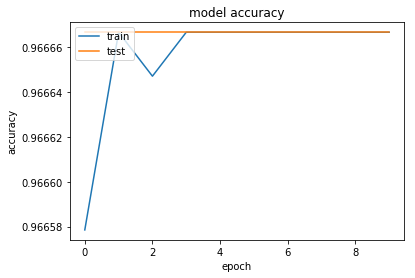

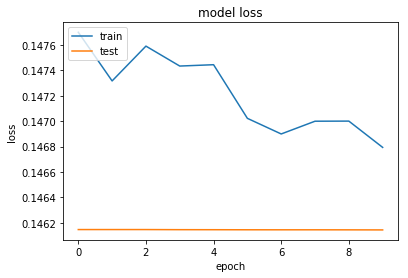

In [0]:
import matplotlib.pyplot as plt
plt.plot(best_model.history.history['acc'])
plt.plot(best_model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(best_model.history.history['loss'])
plt.plot(best_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import pickle
os.mkdir('/content/drive/My Drive/Speech1/Models')
filename = '/content/drive/My Drive/Speech1/Models/CNN_1D_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [0]:
best_run2d, best_model2d = optim.minimize(model=conv_2d_model,
                                          data=data_2d,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='parameteroptimization1', # This is important!
                                          trials=Trials())

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    import numpy as np
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import to_categorical
except:
    pass

try:
    from keras import losses, models, optimizers
except:
    pass

try:
    from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation, GaussianNoise, BatchNormalization, LeakyReLU, AveragePooling2D
except:
    pass

try:
    from keras import regularizers, optimizers
except:
    pass

try:
    from keras.activations import relu, softmax
except:
    pass

try:
    from keras.layers import

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 69s - loss: 0.9395 - acc: 0.9374 - val_loss: 1.0324 - val_acc: 0.9356

Epoch 2/10
 - 62s - loss: 0.6757 - acc: 0.9455 - val_loss: 0.1348 - val_acc: 0.9656

Epoch 3/10
 - 62s - loss: 0.0900 - acc: 0.9738 - val_loss: 0.1029 - val_acc: 0.9697

Epoch 4/10
 - 62s - loss: 0.0247 - acc: 0.9932 - val_loss: 0.0942 - val_acc: 0.9714

Epoch 5/10
 - 62s - loss: 0.0066 - acc: 0.9991 - val_loss: 0.0913 - val_acc: 0.9719

Epoch 6/10
 - 62s - loss: 0.0029 - acc: 0.9999 - val_loss: 0.0904 - val_acc: 0.9724

Epoch 7/10
 - 62s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0898 - val_acc: 0.9725

Epoch 8/10
 - 62s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0894 - val_acc: 0.9727

Epoch 9/10
 - 62s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0891 - val_acc: 0.9728

Epoch 10/10
 - 62s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0889 - val_acc: 0.9728

Test accuracy:
0.9728379345596383
 10%|█         | 1/10 [10:43<1:36:29, 643.30s/it, best loss: -0.972

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 79s - loss: 0.9937 - acc: 0.9362 - val_loss: 0.9829 - val_acc: 0.9357

Epoch 2/10
 - 67s - loss: 1.0095 - acc: 0.9355 - val_loss: 1.0188 - val_acc: 0.9356

Epoch 3/10
 - 67s - loss: 1.0105 - acc: 0.9359 - val_loss: 1.0309 - val_acc: 0.9357

Epoch 4/10
 - 67s - loss: 1.0228 - acc: 0.9356 - val_loss: 1.0045 - val_acc: 0.9355

Epoch 5/10
 - 67s - loss: 1.0196 - acc: 0.9357 - val_loss: 1.0174 - val_acc: 0.9360

Epoch 6/10
 - 67s - loss: 1.0199 - acc: 0.9357 - val_loss: 1.0207 - val_acc: 0.9358

Epoch 7/10
 - 67s - loss: 1.0160 - acc: 0.9357 - val_loss: 1.0177 - val_acc: 0.9359

Epoch 8/10
 - 67s - loss: 1.0007 - acc: 0.9360 - val_loss: 0.9923 - val_acc: 0.9359

Epoch 9/10
 - 67s - loss: 0.9889 - acc: 0.9360 - val_loss: 0.9716 - val_acc: 0.9360

Epoch 10/10
 - 67s - loss: 0.9726 - acc: 0.9366 - val_loss: 0.9854 - val_acc: 0.9368

Test accuracy:
0.9368073571493867
 20%|██        | 2/10 [22:24<1:28:04, 660.53s/it, best loss: -0.972

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 81s - loss: 0.9992 - acc: 0.9358 - val_loss: 1.0296 - val_acc: 0.9358

Epoch 2/10
 - 74s - loss: 1.0339 - acc: 0.9355 - val_loss: 1.0271 - val_acc: 0.9355

Epoch 3/10
 - 74s - loss: 1.0342 - acc: 0.9355 - val_loss: 1.0296 - val_acc: 0.9358

Epoch 4/10
 - 74s - loss: 1.0299 - acc: 0.9355 - val_loss: 1.0318 - val_acc: 0.9356

Epoch 5/10
 - 74s - loss: 1.0347 - acc: 0.9355 - val_loss: 1.0318 - val_acc: 0.9356

Epoch 6/10
 - 74s - loss: 1.0347 - acc: 0.9355 - val_loss: 1.0318 - val_acc: 0.9356

Epoch 7/10
 - 74s - loss: 1.0347 - acc: 0.9355 - val_loss: 1.0318 - val_acc: 0.9356

Epoch 8/10
 - 74s - loss: 1.0347 - acc: 0.9355 - val_loss: 1.0318 - val_acc: 0.9356

Epoch 9/10
 - 74s - loss: 1.0347 - acc: 0.9355 - val_loss: 1.0318 - val_acc: 0.9356

Epoch 10/10
 - 74s - loss: 1.0347 - acc: 0.9355 - val_loss: 1.0318 - val_acc: 0.9356

Test accuracy:
0.9356330431929422
 30%|███       | 3/10 [35:05<1:20:36, 690.88s/it, best loss: -0.972

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 63s - loss: 0.9849 - acc: 0.9361 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 2/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 3/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 4/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 5/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 6/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 7/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 8/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 9/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Epoch 10/10
 - 53s - loss: 1.0306 - acc: 0.9357 - val_loss: 1.0371 - val_acc: 0.9353

Test accuracy:
0.9353027681035733
 40%|████      | 4/10 [44:19<1:04:59, 649.85s/it, best loss: -0.972

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 105s - loss: 1.0180 - acc: 0.9360 - val_loss: 1.0374 - val_acc: 0.9353

Epoch 2/10
 - 94s - loss: 1.0311 - acc: 0.9355 - val_loss: 1.0295 - val_acc: 0.9356

Epoch 3/10
 - 94s - loss: 1.0293 - acc: 0.9357 - val_loss: 1.0221 - val_acc: 0.9355

Epoch 4/10
 - 93s - loss: 1.0325 - acc: 0.9356 - val_loss: 1.0348 - val_acc: 0.9354

Epoch 5/10
 - 93s - loss: 1.0335 - acc: 0.9355 - val_loss: 1.0348 - val_acc: 0.9354

Epoch 6/10
 - 93s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0348 - val_acc: 0.9354

Epoch 7/10
 - 93s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0348 - val_acc: 0.9354

Epoch 8/10
 - 93s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0348 - val_acc: 0.9354

Epoch 9/10
 - 93s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0348 - val_acc: 0.9354

Epoch 10/10
 - 93s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0348 - val_acc: 0.9354

Test accuracy:
0.9354495569981566
 50%|█████     | 5/10 [1:00:24<1:02:01, 744.22s/it, best loss: -0.

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 54s - loss: 0.2111 - acc: 0.9616 - val_loss: 0.1755 - val_acc: 0.9658

Epoch 2/10
 - 50s - loss: 0.1236 - acc: 0.9792 - val_loss: 0.1603 - val_acc: 0.9678

Epoch 3/10
 - 50s - loss: 0.0790 - acc: 0.9906 - val_loss: 0.1254 - val_acc: 0.9699

Epoch 4/10
 - 50s - loss: 0.0498 - acc: 0.9958 - val_loss: 0.1144 - val_acc: 0.9730

Epoch 5/10
 - 50s - loss: 0.0447 - acc: 0.9972 - val_loss: 0.1132 - val_acc: 0.9732

Epoch 6/10
 - 50s - loss: 0.0379 - acc: 0.9976 - val_loss: 0.0981 - val_acc: 0.9738

Epoch 7/10
 - 50s - loss: 0.0246 - acc: 0.9983 - val_loss: 0.0977 - val_acc: 0.9740

Epoch 8/10
 - 50s - loss: 0.0230 - acc: 0.9987 - val_loss: 0.0962 - val_acc: 0.9744

Epoch 9/10
 - 50s - loss: 0.0225 - acc: 0.9987 - val_loss: 0.0956 - val_acc: 0.9747

Epoch 10/10
 - 50s - loss: 0.0222 - acc: 0.9988 - val_loss: 0.0954 - val_acc: 0.9748

Test accuracy:
0.9748073542446172
 60%|██████    | 6/10 [1:08:59<45:01, 675.46s/it, best loss: -0.974

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 57s - loss: 1.0243 - acc: 0.9357 - val_loss: 1.0328 - val_acc: 0.9356

Epoch 2/10
 - 53s - loss: 1.0313 - acc: 0.9357 - val_loss: 1.0326 - val_acc: 0.9356

Epoch 3/10
 - 53s - loss: 1.0313 - acc: 0.9357 - val_loss: 1.0325 - val_acc: 0.9356

Epoch 4/10
 - 53s - loss: 1.0309 - acc: 0.9357 - val_loss: 1.0328 - val_acc: 0.9356

Epoch 5/10
 - 53s - loss: 1.0311 - acc: 0.9357 - val_loss: 1.0324 - val_acc: 0.9356

Epoch 6/10
 - 53s - loss: 1.0307 - acc: 0.9357 - val_loss: 1.0328 - val_acc: 0.9356

Epoch 7/10
 - 53s - loss: 1.0311 - acc: 0.9357 - val_loss: 1.0328 - val_acc: 0.9356

Epoch 8/10
 - 53s - loss: 1.0313 - acc: 0.9357 - val_loss: 1.0328 - val_acc: 0.9356

Epoch 9/10
 - 53s - loss: 1.0313 - acc: 0.9357 - val_loss: 1.0328 - val_acc: 0.9356

Epoch 10/10
 - 53s - loss: 1.0313 - acc: 0.9357 - val_loss: 1.0328 - val_acc: 0.9356

Test accuracy:
0.9355718806905484
 70%|███████   | 7/10 [1:18:08<31:52, 637.47s/it, best loss: -0.974

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 143s - loss: 0.1376 - acc: 0.9663 - val_loss: 0.1178 - val_acc: 0.9679

Epoch 2/10
 - 129s - loss: 0.0931 - acc: 0.9719 - val_loss: 0.1026 - val_acc: 0.9697

Epoch 3/10
 - 129s - loss: 0.0713 - acc: 0.9774 - val_loss: 0.0933 - val_acc: 0.9714

Epoch 4/10
 - 129s - loss: 0.0561 - acc: 0.9822 - val_loss: 0.0880 - val_acc: 0.9729

Epoch 5/10
 - 129s - loss: 0.0443 - acc: 0.9864 - val_loss: 0.0868 - val_acc: 0.9731

Epoch 6/10
 - 129s - loss: 0.0352 - acc: 0.9900 - val_loss: 0.0836 - val_acc: 0.9737

Epoch 7/10
 - 129s - loss: 0.0279 - acc: 0.9929 - val_loss: 0.0820 - val_acc: 0.9742

Epoch 8/10
 - 129s - loss: 0.0222 - acc: 0.9950 - val_loss: 0.0826 - val_acc: 0.9741

Epoch 9/10
 - 129s - loss: 0.0178 - acc: 0.9964 - val_loss: 0.0812 - val_acc: 0.9742

Epoch 10/10
 - 129s - loss: 0.0142 - acc: 0.9976 - val_loss: 0.0810 - val_acc: 0.9742

Test accuracy:
0.9742140797956275
 80%|████████  | 8/10 [1:40:18<28:10, 845.32s/it, best lo

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 77s - loss: 1.0258 - acc: 0.9356 - val_loss: 1.0271 - val_acc: 0.9359

Epoch 2/10
 - 71s - loss: 1.0315 - acc: 0.9354 - val_loss: 1.0102 - val_acc: 0.9360

Epoch 3/10
 - 72s - loss: 1.0221 - acc: 0.9357 - val_loss: 1.0232 - val_acc: 0.9357

Epoch 4/10
 - 72s - loss: 1.0254 - acc: 0.9356 - val_loss: 1.0211 - val_acc: 0.9358

Epoch 5/10
 - 71s - loss: 1.0248 - acc: 0.9357 - val_loss: 1.0256 - val_acc: 0.9358

Epoch 6/10
 - 71s - loss: 1.0296 - acc: 0.9357 - val_loss: 1.0249 - val_acc: 0.9360

Epoch 7/10
 - 71s - loss: 1.0295 - acc: 0.9357 - val_loss: 1.0202 - val_acc: 0.9363

Epoch 8/10
 - 71s - loss: 1.0228 - acc: 0.9361 - val_loss: 1.0214 - val_acc: 0.9361

Epoch 9/10
 - 71s - loss: 1.0259 - acc: 0.9359 - val_loss: 1.0198 - val_acc: 0.9363

Epoch 10/10
 - 71s - loss: 1.0260 - acc: 0.9359 - val_loss: 1.0188 - val_acc: 0.9364

Test accuracy:
0.9363547576676815
 90%|█████████ | 9/10 [1:52:31<13:31, 811.54s/it, best loss: -0.974

/content/temp_model.py:173: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8173 samples, validate on 5450 samples
Epoch 1/10
 - 80s - loss: 0.9890 - acc: 0.9361 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 2/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 3/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 4/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 5/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 6/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 7/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 8/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 9/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Epoch 10/10
 - 71s - loss: 1.0336 - acc: 0.9355 - val_loss: 1.0297 - val_acc: 0.9358

Test accuracy:
0.9357676005144732
100%|██████████| 10/10 [2:04:49<00:00, 789.56s/it, best loss: -0.97

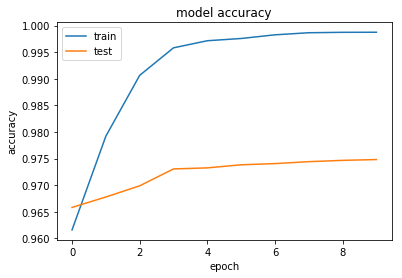

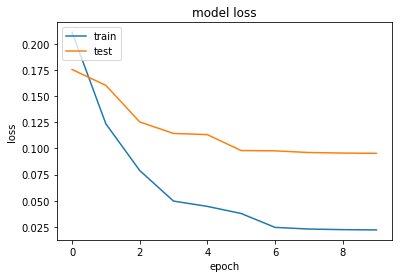

In [0]:
import matplotlib.pyplot as plt
plt.plot(best_model2d.history.history['acc'])
plt.plot(best_model2d.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(best_model2d.history.history['loss'])
plt.plot(best_model2d.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
best_run2d

{'Conv2D': 1,
 'Conv2D_1': 0,
 'Conv2D_2': 2,
 'batch_size': 0,
 'kernel_size': 2,
 'optimizer': 2}

In [0]:
import pickle
filename = '/content/drive/My Drive/Speech1/Models/CNN_2D_model.sav'
pickle.dump(best_model2d, open(filename, 'wb'))

In [0]:
def solvethis(a,b):
  return a+b

s = solvethis(2,3)
print(s)

5
